# 4-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from category_encoders import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from scipy import stats
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Week 4 Data/iris.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#statistics
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#null check
df.isnull().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

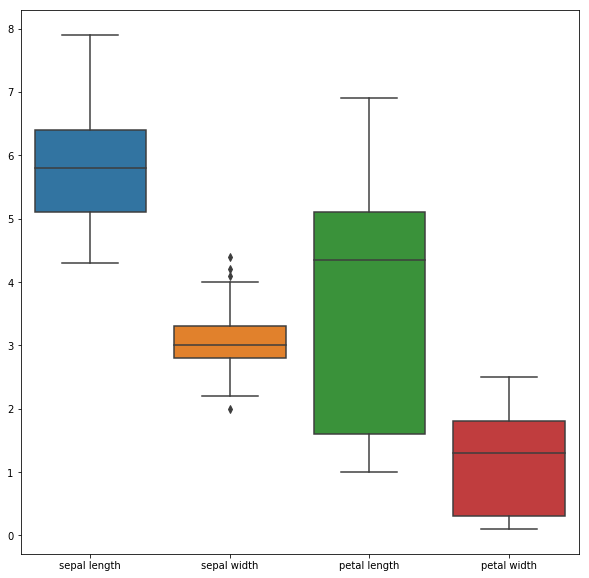

In [6]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)

In [7]:
#Removing Outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.5
dtype: float64


In [8]:
#Series comparison with each column of df 
#(df[df[col]<x] 이건 df의 series의 값을 scalar와 비교, df<Series 이건 df의 series를 다른 series와 비교)
df_refined = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [9]:
#correlation check
corr = df_refined.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,sepal length,sepal width,petal length,petal width
sepal length,1,-0.113977,0.879374,0.822577
sepal width,-0.113977,1,-0.397123,-0.329782
petal length,0.879374,-0.397123,1,0.961755
petal width,0.822577,-0.329782,0.961755,1


In [10]:
#encode class col
enc = BinaryEncoder(cols=['class']).fit(df_refined)
enc_df = enc.transform(df_refined)

In [11]:
enc_df.head()

,class_0,class_1,class_2,sepal length,sepal width,petal length,petal width
0,0,0,1,5.1,3.5,1.4,0.2
1,0,0,1,4.9,3.0,1.4,0.2
2,0,0,1,4.7,3.2,1.3,0.2
3,0,0,1,4.6,3.1,1.5,0.2
4,0,0,1,5.0,3.6,1.4,0.2


In [12]:
#df to lists
X = enc_df.loc[:,enc_df.columns != 'petal width'].values
y = enc_df.loc[:,enc_df.columns == 'petal width'].values.ravel()

In [13]:
#dummy trap 피하기
X = X[:,1:]

In [14]:
#train_test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
#model instantiate
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
regressor.score(X_test,y_test)

0.9412275782438397

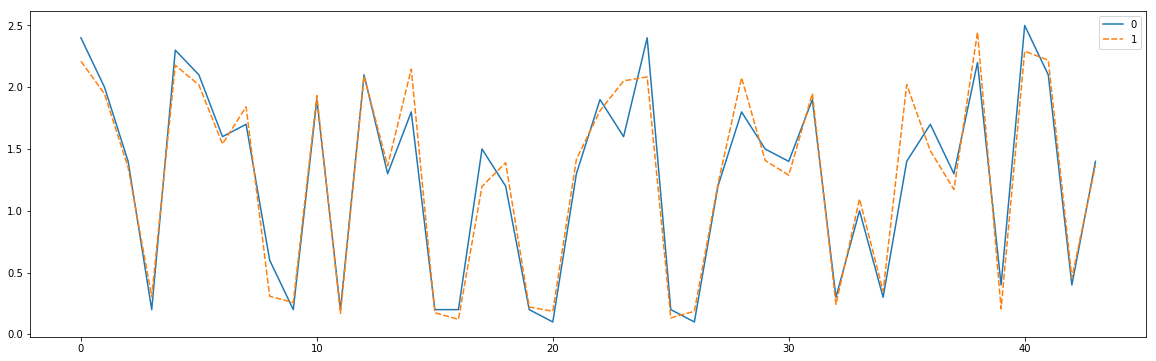

In [18]:
plt.figure(figsize=(20, 6))
list_data = [y_test, y_pred]
ax = sns.lineplot(data=list_data)

# 4-2

In [19]:
df = pd.read_csv('Week 4 Data/cell_samples_string.csv')
df.drop(columns=['ID'],inplace=True)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign


In [20]:
#Statistics table
df.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.577969,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.608431,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


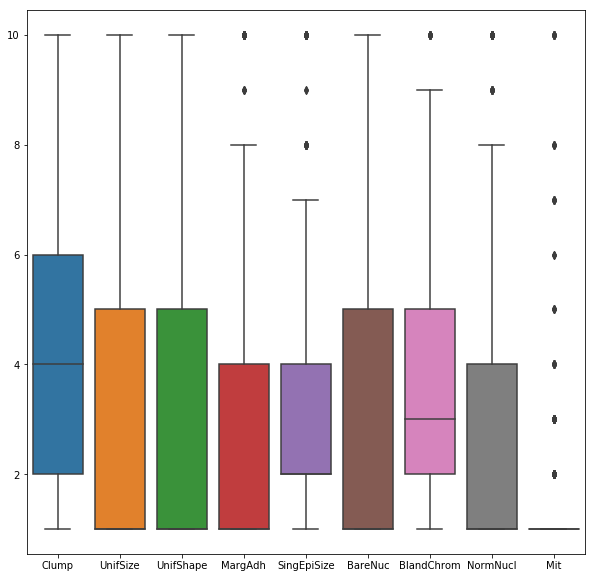

In [21]:
#boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)

In [22]:
#Remove outlier based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Clump          4.0
UnifSize       4.0
UnifShape      4.0
MargAdh        3.0
SingEpiSize    2.0
BareNuc        4.0
BlandChrom     3.0
NormNucl       3.0
Mit            0.0
dtype: float64


In [24]:
df_refined = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [25]:
df_refined.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.00000,504.0
mean,3.422619,1.803571,1.976190,1.623016,2.269841,2.246032,2.484127,1.52381,1.0
std,2.211924,1.817495,1.910375,1.370212,1.008218,2.662415,1.598877,1.40272,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.0
75%,5.000000,2.000000,2.000000,1.250000,2.000000,1.000000,3.000000,1.00000,1.0
max,10.000000,10.000000,10.000000,8.000000,7.000000,10.000000,9.000000,8.00000,1.0


In [26]:
#Removing Mit since 0 variance
df_refined.drop(columns=['Mit'],inplace=True)

/Users/danielhan/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
df_refined

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Class
0,5,1,1,1,2,1,3,1,benign
1,5,4,4,5,7,10,3,2,benign
2,3,1,1,1,2,2,3,1,benign
3,6,8,8,1,3,4,3,7,benign
4,4,1,1,3,2,1,3,1,benign
5,8,10,10,8,7,10,9,7,malignant
6,1,1,1,1,2,10,3,1,benign
7,2,1,2,1,2,1,3,1,benign
9,4,2,1,1,2,1,2,1,benign
10,1,1,1,1,1,1,3,1,benign


In [28]:
#correlation check
corr = df_refined.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl
Clump,1,0.552305,0.56226,0.420006,0.391823,0.475186,0.42941,0.41356
UnifSize,0.552305,1,0.901618,0.659147,0.651737,0.701057,0.625253,0.668184
UnifShape,0.56226,0.901618,1,0.630744,0.625752,0.721536,0.628622,0.63379
MargAdh,0.420006,0.659147,0.630744,1,0.527097,0.618397,0.483664,0.520827
SingEpiSize,0.391823,0.651737,0.625752,0.527097,1,0.572907,0.473776,0.512762
BareNuc,0.475186,0.701057,0.721536,0.618397,0.572907,1,0.641212,0.504679
BlandChrom,0.42941,0.625253,0.628622,0.483664,0.473776,0.641212,1,0.524051
NormNucl,0.41356,0.668184,0.63379,0.520827,0.512762,0.504679,0.524051,1


In [29]:
#다중공선성을 띄는 UnifSize와 UnifShape중 어떤걸 떨궈야할까?
print(corr.UnifSize.sum())
print(corr.UnifShape.sum())

5.7593006009186745
5.704322063008071


In [30]:
#다른변수에 더 영향을 미치는 UnifSize를 drop하겠음.
df_refined.drop(columns=['UnifSize'],inplace=True)

In [31]:
#LDA 차원축소를 위해 X,y로 데이터를 나눔.
X = df_refined.iloc[:,:-1].values
y = df_refined.iloc[:,-1].values

In [32]:
clf = LinearDiscriminantAnalysis()
clf.fit_transform(X,y)

array([[-5.36259902e-01],
       [ 4.53184966e+00],
       [-4.25360890e-01],
       [ 3.38499501e+00],
       [-5.37401075e-01],
       [ 8.52408733e+00],
       [ 2.68717657e+00],
       [-7.73453979e-01],
       [-8.92310076e-01],
       [-1.18059730e+00],
       [-1.21021656e+00],
       [ 1.55044200e+00],
       [-3.14461878e-01],
       [ 1.71112133e+00],
       [-8.92310076e-01],
       [-6.95213142e-01],
       [-3.77306661e-01],
       [-1.05126332e+00],
       [ 3.66610585e+00],
       [-1.17207286e+00],
       [ 3.41070682e+00],
       [-1.05978775e+00],
       [-7.33356835e-01],
       [-1.21021656e+00],
       [-1.08693544e+00],
       [-1.05978775e+00],
       [-1.01311962e+00],
       [-9.34213590e-01],
       [-8.11597672e-01],
       [-1.21021656e+00],
       [ 4.02556637e-01],
       [ 3.54580967e+00],
       [ 5.38645346e+00],
       [-1.36916980e+00],
       [-5.37401075e-01],
       [ 1.86105659e+00],
       [ 4.00500181e+00],
       [ 4.23061244e+00],
       [ 1.9

In [33]:
clf.fit_transform(X,y).ravel()

array([-5.36259902e-01,  4.53184966e+00, -4.25360890e-01,  3.38499501e+00,
       -5.37401075e-01,  8.52408733e+00,  2.68717657e+00, -7.73453979e-01,
       -8.92310076e-01, -1.18059730e+00, -1.21021656e+00,  1.55044200e+00,
       -3.14461878e-01,  1.71112133e+00, -8.92310076e-01, -6.95213142e-01,
       -3.77306661e-01, -1.05126332e+00,  3.66610585e+00, -1.17207286e+00,
        3.41070682e+00, -1.05978775e+00, -7.33356835e-01, -1.21021656e+00,
       -1.08693544e+00, -1.05978775e+00, -1.01311962e+00, -9.34213590e-01,
       -8.11597672e-01, -1.21021656e+00,  4.02556637e-01,  3.54580967e+00,
        5.38645346e+00, -1.36916980e+00, -5.37401075e-01,  1.86105659e+00,
        4.00500181e+00,  4.23061244e+00,  1.96012103e+00, -9.40364305e-01,
       -1.36916980e+00, -6.95213142e-01, -1.04045599e+00, -2.54025546e-01,
        3.06169068e-01, -1.74887919e-01, -6.50172865e-01, -6.54450802e-01,
        3.44460318e-03, -1.20169212e+00,  6.40931911e-03, -8.13404042e-01,
       -5.36259902e-01,  

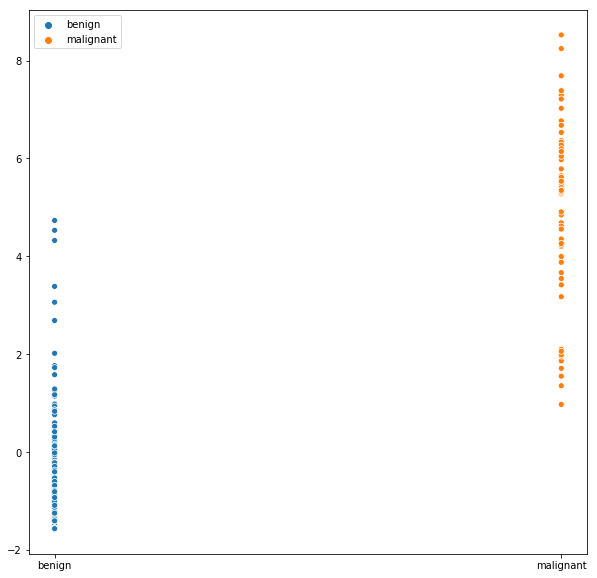

In [34]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x = y,y=clf.fit_transform(X,y).ravel(),hue = y)

In [36]:
clf.score(X,y)

0.9682539682539683

# 4-3

In [37]:
#import data
df = pd.read_csv('Week 4 Data/vehicle.csv').iloc[:,1:]
df.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,van
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,van
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,saab
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,van
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,bus


In [38]:
#data statistics
df.describe()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.449532,0.456219,0.584565,0.283585,0.161471,0.123913,0.371498,0.426680,0.298562,0.428555,0.308554,0.306848,0.413228,0.177134,0.289867,0.307300,0.431087,0.487746
std,0.179010,0.237302,0.219049,0.146167,0.086684,0.086815,0.217287,0.223187,0.216011,0.207366,0.165236,0.211862,0.204695,0.098513,0.223561,0.217835,0.205465,0.247960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.269231,0.416667,0.161572,0.109890,0.094340,0.223856,0.200000,0.166667,0.271429,0.194737,0.160971,0.251572,0.105263,0.090909,0.121951,0.266667,0.308333
50%,0.434783,0.423077,0.555556,0.275109,0.153846,0.113208,0.294118,0.485714,0.250000,0.400000,0.255263,0.215827,0.402516,0.164474,0.272727,0.268293,0.400000,0.533333
75%,0.586957,0.615385,0.805556,0.397380,0.197802,0.150943,0.562092,0.571429,0.500000,0.585714,0.457895,0.483213,0.559748,0.210526,0.409091,0.463415,0.566667,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#null check
df.isnull().any()

Col0     False
Col1     False
Col2     False
Col3     False
Col4     False
Col5     False
Col6     False
Col7     False
Col8     False
Col9     False
Col10    False
Col11    False
Col12    False
Col13    False
Col14    False
Col15    False
Col16    False
Col17    False
Col18    False
dtype: bool

In [40]:
df.skew()

Col0     0.381271
Col1     0.262799
Col2     0.107221
Col3     0.390706
Col4     3.821570
Col5     6.778409
Col6     0.605779
Col7     0.047845
Col8     0.770685
Col9     0.256359
Col10    0.651814
Col11    0.835837
Col12    0.280231
Col13    2.072584
Col14    0.773792
Col15    0.689326
Col16    0.248541
Col17   -0.226341
dtype: float64

In [41]:
#Removing Col 4,5 for std <0.1, Col 7 for skew <0.1
df.drop(columns=['Col4','Col5','Col7'],inplace=True)

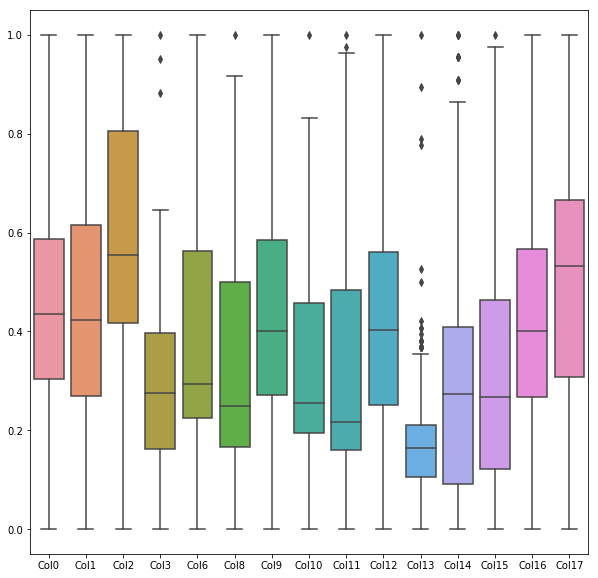

In [42]:
#boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)

In [43]:
#removing outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df_refined = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

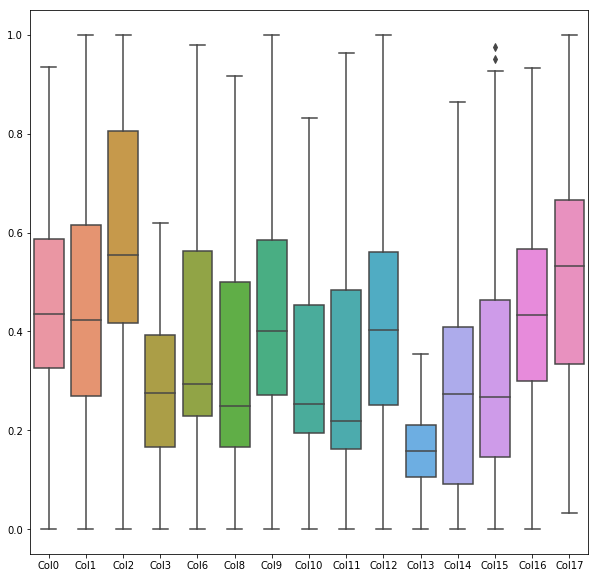

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_refined)

In [45]:
#correlation check
corr = df_refined.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Col0,Col1,Col2,Col3,Col6,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17
Col0,1,0.684414,0.785807,0.744006,0.809211,0.809895,0.670285,0.791627,0.815896,0.574619,-0.240318,0.190357,0.157963,0.281102,0.355086
Col1,0.684414,1,0.79235,0.642202,0.855498,0.85443,0.965674,0.814298,0.849144,0.935994,0.095512,0.139849,-0.0211212,-0.141845,0.0209275
Col2,0.785807,0.79235,1,0.808974,0.908547,0.898518,0.766857,0.887133,0.893055,0.702849,-0.219948,0.0908696,0.258642,0.107271,0.309328
Col3,0.744006,0.642202,0.808974,1,0.79502,0.76842,0.575308,0.800056,0.785947,0.555608,-0.379901,0.0312942,0.178845,0.398032,0.486346
Col6,0.809211,0.855498,0.908547,0.79502,1,0.991888,0.807393,0.980796,0.996585,0.794157,0.0193908,0.0542091,0.213158,-0.0196887,0.108708
Col8,0.809895,0.85443,0.898518,0.76842,0.991888,1,0.812076,0.967773,0.992054,0.792089,0.034041,0.0628381,0.216341,-0.0444249,0.0892176
Col9,0.670285,0.965674,0.766857,0.575308,0.807393,0.812076,1,0.75,0.796965,0.866599,0.0725622,0.131281,-0.00568861,-0.139282,0.0563829
Col10,0.791627,0.814298,0.887133,0.800056,0.980796,0.967773,0.75,1,0.979944,0.781037,0.0355127,0.0254324,0.204762,0.00382679,0.0860009
Col11,0.815896,0.849144,0.893055,0.785947,0.996585,0.992054,0.796965,0.979944,1,0.790722,0.0285889,0.0552462,0.207066,-0.0150623,0.0977785
Col12,0.574619,0.935994,0.702849,0.555608,0.794157,0.792089,0.866599,0.781037,0.790722,1,0.23237,0.16606,-0.0576885,-0.247637,-0.127279


In [46]:
#너무엉망이라 걍 이번 실습에서는 그대로 다 집어넣고 가겠음.
#X,y로 나누고 partitioning
X = df_refined.iloc[:,:-1].values
y = df_refined.iloc[:,-1].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
#gridsearch로 best parameter optimization 실시
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X_train,y_train,10)

/Users/danielhan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 1}

In [49]:
clf = svm.SVC(C=10,gamma=1)
clf.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[42,  0,  0,  0],
       [ 0, 29,  6,  0],
       [ 1, 10, 28,  0],
       [ 1,  1,  1, 42]])

In [52]:
#Accuracy of optimized rbf hyperparameters
clf.score(X_test,y_test)

0.8757763975155279

# 4-4

In [53]:
#import data with dropping unnecessary columns
df = pd.read_csv('Week 4 Data/Churn123.txt', sep=",", header=0).iloc[:,1:-1]
df.head()

,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED
0,5.24640,7.51510,86.32780,0,'CH','FreeLocal','Standard',57,'F','M',2,27535.3,'Y','Vol'
1,0.00000,0.00000,3.94229,0,'CC','Budget','Intnl_discount',50,'F','S',2,64632.3,'N','InVol'
2,5.55564,0.00000,9.36347,1,'CC','Budget','Intnl_discount',68,'F','M',2,81000.9,'N','Vol'
3,14.01930,5.68043,29.80650,0,'CC','Budget','Standard',34,'M','S',0,87467.1,'Y','Current'
4,13.66400,2.95642,32.63810,0,'CC','FreeLocal','Intnl_discount',60,'M','M',2,83220.6,'N','Vol'


In [54]:
#Added new column
df['Leaver'] = df['CHURNED'].apply(lambda x: 1 if x == "'Vol'" else 0)

In [55]:
#Data Statistics
df.describe()

,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income,Leaver
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,13.637284,0.836382,51.364432,0.123223,57.562627,0.989167,50290.691485,0.347326
std,9.394239,2.236858,54.682594,0.424179,22.842655,0.824681,28445.207066,0.476282
min,0.000000,0.000000,0.049147,0.000000,18.000000,0.000000,110.284000,0.000000
25%,5.173330,0.000000,13.460000,0.000000,38.000000,0.000000,25445.600000,0.000000
50%,13.683000,0.000000,35.014400,0.000000,58.000000,1.000000,50290.700000,0.000000
75%,22.078400,0.000000,71.661400,0.000000,77.000000,2.000000,75004.500000,1.000000
max,29.982000,9.950900,450.624000,4.000000,97.000000,2.000000,99832.900000,1.000000


In [56]:
#normalize using z-score
df = df.apply(lambda x: stats.zscore(x) if x.name == 'LONGDIST' or x.name == 'International' or x.name == 'LOCAL' or x.name == 'DROPPED' or x.name == 'AGE' or x.name == 'CHILDREN' or x.name == 'Est_Income' else x)

In [57]:
df.describe()

,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income,Leaver
count,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1.477000e+03,1477.000000
mean,2.939047e-17,-9.471097e-18,-3.735822e-17,4.532596e-17,-1.244773e-16,-1.834085e-17,1.185766e-16,0.347326
std,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,1.000339e+00,0.476282
min,-1.452156e+00,-3.740359e-01,-9.387387e-01,-2.905954e-01,-1.732549e+00,-1.199860e+00,-1.764705e+00,0.000000
25%,-9.012780e-01,-3.740359e-01,-6.934066e-01,-2.905954e-01,-8.566978e-01,-1.199860e+00,-8.737327e-01,0.000000
50%,4.868003e-03,-3.740359e-01,-2.991001e-01,-2.905954e-01,1.915369e-02,1.314015e-02,2.994570e-07,0.000000
75%,8.988461e-01,-3.740359e-01,3.713036e-01,-2.905954e-01,8.512126e-01,1.226140e+00,8.691158e-01,1.000000
max,1.740455e+00,4.076077e+00,7.303874e+00,9.142580e+00,1.727064e+00,1.226140e+00,1.742261e+00,1.000000


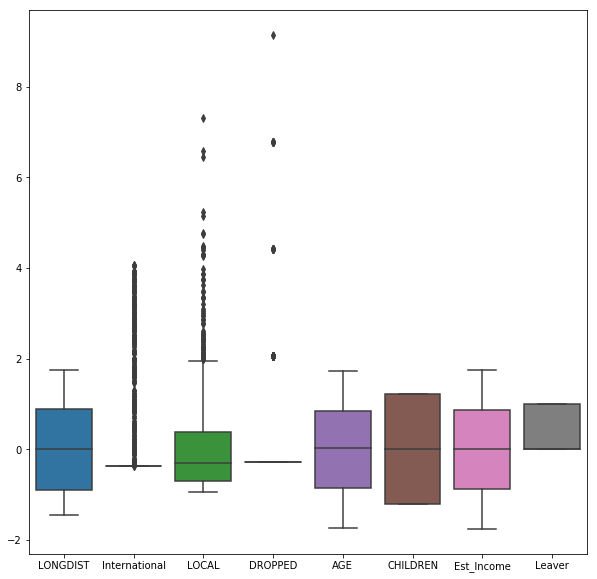

In [58]:
#box-plot
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [59]:
#outlier drop
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_refined = df[~((df < Q1-1.5*IQR)|(df > Q3+1.5*IQR)).any(axis=1)]

In [60]:
df_refined.describe()

,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income,Leaver
count,1063.000000,1.063000e+03,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000,1063.000000
mean,-0.036201,-3.740359e-01,-0.182973,-2.905954e-01,0.004076,-0.001694,-0.051819,0.267168
std,1.007045,4.276371e-15,0.673612,7.219846e-15,0.999933,1.004882,0.990359,0.442689
min,-1.452156,-3.740359e-01,-0.938739,-2.905954e-01,-1.732549,-1.199860,-1.764705,0.000000
25%,-0.997013,-3.740359e-01,-0.730392,-2.905954e-01,-0.856698,-1.199860,-0.915733,0.000000
50%,-0.030527,-3.740359e-01,-0.388513,-2.905954e-01,0.019154,0.013140,-0.025985,0.000000
75%,0.863882,-3.740359e-01,0.201723,-2.905954e-01,0.851213,1.226140,0.777307,1.000000
max,1.740455,-3.740359e-01,1.956908,-2.905954e-01,1.727064,1.226140,1.742261,1.000000


In [61]:
enc = BinaryEncoder(cols=['PAY_MTHD', 'LocalBillType','LongDistanceBillType','SEX','STATUS','Car_Owner']).fit(df_refined)
enc_df = enc.transform(df_refined)

In [62]:
enc_df.columns

Index(['PAY_MTHD_0', 'PAY_MTHD_1', 'PAY_MTHD_2', 'LocalBillType_0',
       'LocalBillType_1', 'LongDistanceBillType_0', 'LongDistanceBillType_1',
       'SEX_0', 'SEX_1', 'STATUS_0', 'STATUS_1', 'Car_Owner_0', 'Car_Owner_1',
       'LONGDIST', 'International', 'LOCAL', 'DROPPED', 'AGE', 'CHILDREN',
       'Est_Income', 'CHURNED', 'Leaver'],
      dtype='object')

In [63]:
#X,y Split
X = enc_df.iloc[:,:-2].values
y = enc_df.iloc[:,-1].values

In [64]:
#train_test_sp,it
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [65]:
clf = LogisticRegression(solver='sag',max_iter=2000)
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
clf.score(X_test,y_test)

0.7523510971786834